In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%run rbf.ipynb

In [2]:
n_generated = 200
n_samples = 5*n_generated
radius_in = 3
radius_out = 7
x = np.linspace(-np.sqrt(radius_in),np.sqrt(radius_in),n_generated)
x = x.reshape(-1,1)
points_in = np.hstack((x,x))

x_out = np.linspace(-np.sqrt(radius_out),np.sqrt(radius_out),n_generated)
x_out = x_out.reshape(-1,1)
points_out = np.hstack((x_out,x_out))

In [3]:
np.random.seed(1871781)
points_in[:,1] = np.sqrt(np.abs(radius_in - points_in[:,0]**2))
noise_up_in = np.random.uniform(-0.1,0.1,n_generated)
noise_down_in = np.random.uniform(-0.1,0.1,n_generated)

points_out[:,1] = np.sqrt(np.abs(radius_out - points_out[:,0]**2))
noise_up_out = np.random.uniform(-0.1,0.1,n_generated)
noise_down_out = np.random.uniform(-0.1,0.1,n_generated)

center = np.random.multivariate_normal(mean=np.array((0,0)),cov=np.eye(2)*0.02,size=n_generated)

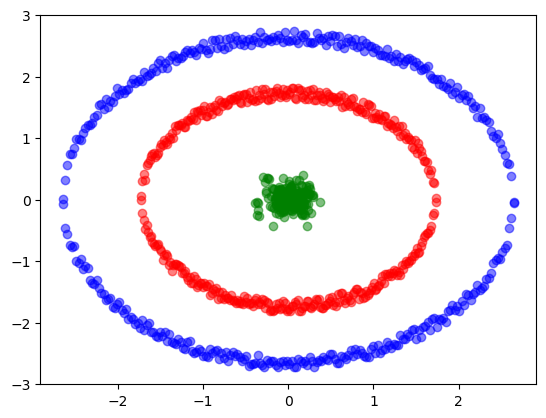

In [4]:
plt.plot(points_in[:,0],points_in[:,1]+noise_up_in,'ro',alpha=0.5)
plt.plot(points_in[:,0],-points_in[:,1]+noise_down_in,'ro',alpha=0.5)
plt.plot(points_out[:,0],points_out[:,1]+noise_up_out,'bo',alpha=0.5)
plt.plot(points_out[:,0],-points_out[:,1]+noise_down_out,'bo',alpha=0.5)
plt.plot(center[:,0],center[:,1],'go',alpha=0.5)
#plt.plot(np.linspace(-2,2,10),np.linspace(-2,2,10)*0.75)

In [5]:
up_in = points_in[:,1]+noise_up_in
up_in = up_in.reshape(-1,1)
down_in = -points_in[:,1]+noise_up_in
down_in = down_in.reshape(-1,1)
data_in = np.hstack((x,up_in))
data_down_in = np.hstack((x,down_in))

up_out = points_out[:,1]+noise_up_out
up_out = up_out.reshape(-1,1)
down_out = -points_out[:,1]+noise_up_out
down_out = down_out.reshape(-1,1)
data_out = np.hstack((x_out,up_out))
data_down_out = np.hstack((x_out,down_out))



whole_data = np.vstack((data_in,data_down_in,data_out,data_down_out,center))

In [6]:
sigma = 1/30
W = np.zeros((n_samples,n_samples))
for i in range(n_samples):
    for k in range(i,n_samples):
        W[i,k] = rbf(x=whole_data[i,:],y=whole_data[k,:],l_squared=sigma)
        if W[i,k] <= 0:
            W[i,k] = 0
        W[k,i] = W[i,k]
    W[i,i] = 1
    
diag_mat = np.eye(n_samples)

for i in range(n_samples):
    diag_mat[i,i] = np.sum(W[i,:])

L = diag_mat - W

eigenvalues, eigenvectors = np.linalg.eig(L)

for i in range(eigenvalues.shape[0]):
    if eigenvalues[i]<1e-5:
        eigenvalues[i] = 0

sorted_eigenvalues = np.argsort(eigenvalues)

n_cluster = 3
n_components = 2
U = np.zeros((n_samples,n_components))
for i in range(n_components):
    U[:,i] = eigenvectors[:,sorted_eigenvalues[i]]

cluster_fit = KMeans(n_clusters=n_cluster,random_state=1871786).fit(U)
labels = cluster_fit.predict(U)
df_points = pd.DataFrame(whole_data)
df_points['label'] = labels
df_points.columns = ['x1','x2','label']
colors = {0: 'blue', 1: 'red',2:'green'}
color_list = [colors[group] for group in df_points['label']]

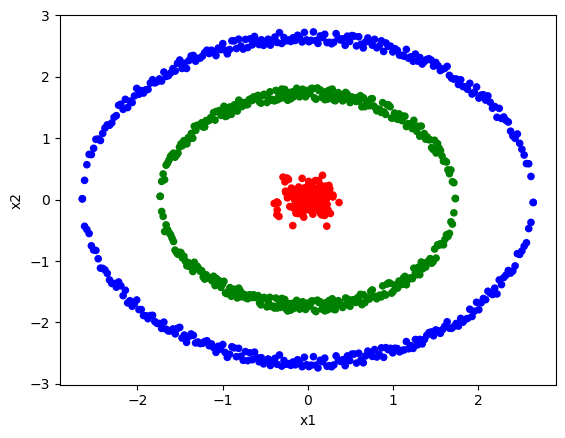

In [7]:
ax = df_points.plot.scatter('x1','x2', c=color_list)

In [8]:
np.sort(eigenvalues)[:3]

array([0.        , 0.        , 0.00055526])